## CA 2, LLMs Spring 2024

- **Name:** Ali Keramati
- **Student ID:** 810198519

---
#### Your submission should be named using the following format: `CA2_LASTNAME_STUDENTID_soft_prompt.ipynb`.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
mohammad136631@gmail.com

---

# What are Soft prompts?
Soft prompts are learnable tensors concatenated with the input embeddings that can be optimized to a dataset; the downside is that they aren’t human readable because you aren’t matching these “virtual tokens” to the embeddings of a real word.
<br>
<div>
<img src="https://www.researchgate.net/publication/366062946/figure/fig1/AS:11431281105340756@1670383256990/The-comparison-between-the-previous-T5-prompt-tuning-method-part-a-and-the-introduced.jpg"/>
</div>

Read More:
<br>[Youtube : PEFT and Soft Prompt](https://www.youtube.com/watch?v=8uy_WII76L0)
<br>[Paper: The Power of Scale for Parameter-Efficient Prompt Tuning](https://arxiv.org/pdf/2104.08691.pdf)
https://arxiv.org/pdf/2101.00190.pdf
<br>[Paper: Prefix-Tuning: Optimizing Continuous Prompts for Generation](https://arxiv.org/pdf/2101.00190.pdf)

# Part 1 (20 Points)
Before diving into the practical applications, let's first ensure your foundational knowledge is solid. Please answer the following questions.


**A) Compare and contrast model tuning and prompt tuning in terms of their effectiveness for specific downstream tasks. (5 Points)**

**B) Explore the challenges associated with interpreting soft prompts in the continuous embedding space and propose potential solutions. (5 Points)**

**C) What is the effect of initializing prompts randomly versus initializing them from the vocabulary, and how does this impact the performance of prompt tuning? (5 Points)**

**D) How is the optimization process in the prefix tuning(<br>[Prefix-Tuning: Optimizing Continuous Prompts for Generation](https://arxiv.org/pdf/2101.00190.pdf)) and Why did they use this technique? (5 Points)**


## Question A

There are two strategies to fine-tune LLMs for downstream tasks, including “model-tuning” – updating LLMs parameters in training, or “prompt-tuning” – updating soft prompts while keeping LLMs frozen [[ref]](https://arxiv.org/pdf/2310.06239).

**Model Tuning**
- Pros:
    - When sufficient task-specific data is available, model tuning can result in very high performance on the target task.
    - Model tuning often results in better performance on the target task compared to prompt tuning, as the model can adapt its internal representations to that task.
- Cons:
    - This approach is computationally expensive (time-consuming and resource-intensive) especially for large models.
    - There's a risk of overfitting to the training data, especially if the task-specific dataset is not large enough or representative and may not generalize well to other tasks, requiring separate fine-tuning for each new task.

**Prompt Tuning:**
- Pros
    - This approach is computationally efficient, as it requires updating only a small number of parameters, suitable when when resources (computational power, labeled data) are limited.
    - With prompt tuning, changes can be made relatively quickly to adapt the model to different tasks or variations of the same task.
    - Prompt tuning is more parameter-efficient and can potentially generalize better to unseen tasks, as the model's core knowledge remains intact.
- Cons:
    - However, the performance of prompt tuning may be lower than model tuning for some tasks, as the model's internal representations are not directly adapted to the target task.


**Choosing Between Model Tuning and Prompt Tuning:**
1. Task complexity: For more complex tasks with abundant labeled data that require significant adaptation and learning of task-specific patterns, model tuning may be more effective, as it allows the model to fully adapt its internal representations.

2. Available computational resources: When computational resources or labeled task-specific data are limited, prompt tuning can be a more practical approach.

3. Task diversity: If the goal is to adapt the model to multiple diverse tasks, prompt tuning may be preferred, as it can potentially generalize better to unseen tasks without the need for separate fine-tuning for each task. Also, there is no need to store a fine-tuned LLM for each task, which is not memory efficient. Instead, it is possible to store an LLM alongside separate parameters specific to each task.

4. Performance requirements: If the highest possible performance on a specific task is critical, model tuning may be the better choice, as it typically achieves better task-specific performance compared to prompt tuning.


## Question B




Challenges of interpreting soft prompts in the continuous embedding space presents:

1. **Explainability**: Soft prompts are vectors of real numbers that are prepended to the embedding layer of a Pre-trained Language Model (PLM), and they represent abstract features rather than human-understandable concepts, so they can be difficult to interpret in natural language. In other words, it is difficult to explain why a particular soft prompt leads to specific model behaviors or outputs [[ref]](https://openreview.net/pdf?id=5U6lTLr1jZw).

2. **Semantic Space Inconsistency**: The embedding dimensions and semantic spaces of different PLMs are inconsistent, making it tricky for cross-model transfer of continuous prompts [[ref]](https://openreview.net/pdf?id=MHWDdMEJ5s).

3. **High-dimensional Embedding Space**: Soft prompts are represented as dense vectors in a high-dimensional embedding space, making it difficult to interpret the semantic meaning or patterns encoded in these vectors.


Potential solutions to these challenges include:

- **Meta-Learning for Better Initialization**: Meta-learning algorithms can be used to pre-train prompts with a better initialization by discovering commonalities among auxiliary tasks, which can improve the performance and stability of soft prompts.

- **Prompt Waywardness Hypothesis**: Investigating the Prompt Waywardness hypothesis, which suggests that there exists a soft prompt that can solve the target task while becoming close to arbitrary discrete prompts, can help interpret soft prompts in human language.

- **Zero-Shot Continuous Prompt Transfer**: An encode-then-search strategy that maps a continuous prompt into a relative space for transfer between language models can address the issue of semantic space inconsistency and facilitate the reuse of continuous prompts across different LLMs⁶.

- Clustering algorithms can be applied to identify patterns or groups within the embedding space, potentially revealing semantic similarities or differences between prompts.

## Question C

As proposed in the [*The Power of Scale for Parameter-Efficient Prompt Tuning*](https://arxiv.org/abs/2104.08691) paper, initializing prompts randomly leads to poorer performance compared to more targeted initialization methods such as using sampled vocabulary or class label embeddings. However, as the model size increases, the performance gaps between these initialization methods diminish, suggesting that larger models can accommodate less optimal initialization strategies to some extent.


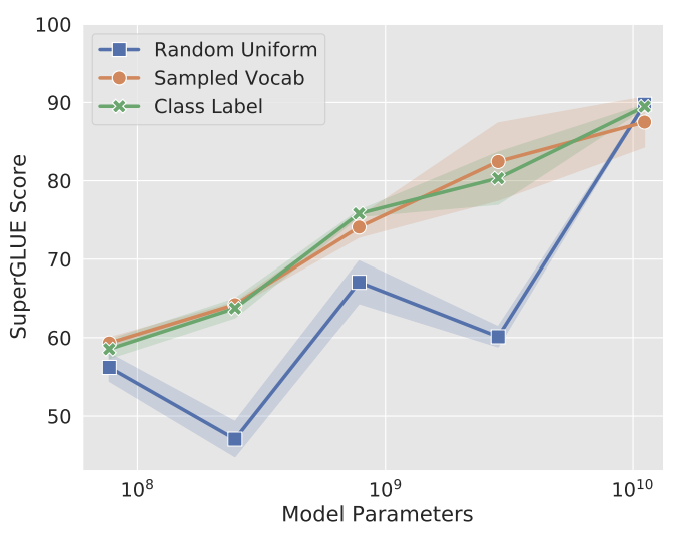


Also in the [*Prefix-Tuning: Optimizing Continuous Prompts for Generation*](https://arxiv.org/abs/2101.00190) paper, (which they use the embedding in all layers rather than the input layer) they find that how the prefix is initialized has a large impact in low-data settings. Random initialization leads to low performance with high variance.



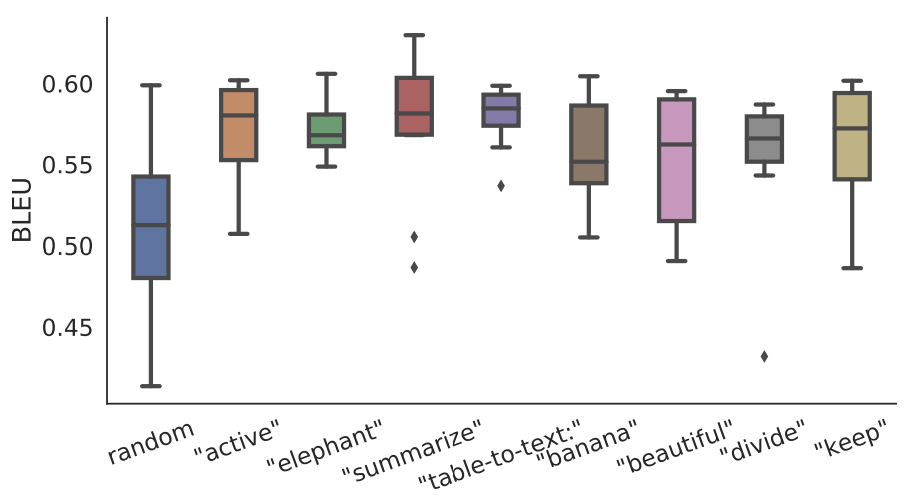

So as in my opinion, the impact on performance is as follows:

- **low-data regime and smaller models:** In this setting, vocabulary-based initialization tends to outperform random initialization. This is because the prompts are already somewhat aligned with the task, allowing the model to adapt more quickly with fewer examples.


- **full data settings and bigger models:** In this setting, the difference in performance between the two initialization methods may diminish. Both approaches can reach similar levels of performance, but vocabulary-based initialization might still converge faster.

## Question D

This technique keeps the language model parameters frozen but optimizes a small continuous task-specific vector known as the prefix. As proposed in Section 4.3, "Parametrization of Pθ", directly taking the gradient loss of the parameters related to prefixes can lead to unstable optimization and a slight drop in performance. Therefore, it is suggested that instead of optimizing all of  Pθ", a reparametrization of  Pθ is conducted by transforming it to a lower dimension. They use a Multi-Layer Perceptron (MLP) to act as an up-projection. It is suggested that we optimize Pθ instead, which has a lower dimension, considering P'θ as the trainable weight. $\varphi$ is also the function that maps  P'θ to Pθ and is also a trainable parameter. In fact, optimization in high dimensions is a challenging task, and the curse of dimensionality not only affects learning but also exists in optimization. Here, the input dimension is reduced for the optimization of Pθ.

How can we demonstrate that this reduction of dimensionality works? When θ, as the answer to the problem, resides in a low-dimensional space (it can be mapped to a lower manifold), $\varphi$ can be the parametrization of that manifold and maps each point of the high-dimensional space to another parameter space of lower dimension. Therefore, if we conduct optimization in the lower-dimensional space, it would be equivalent to optimizing in the high-dimensional space where Pθ existed.

They propose two trainable parameter sets, P'θ and $\varphi$, and perform gradient descent on them. After training, by providing  P'θ to the $\varphi$ network, Pθ is derived and can be used for our model. Once training is complete, these reparametrization parameters can be discarded, and only the prefix Pθ needs to be saved.

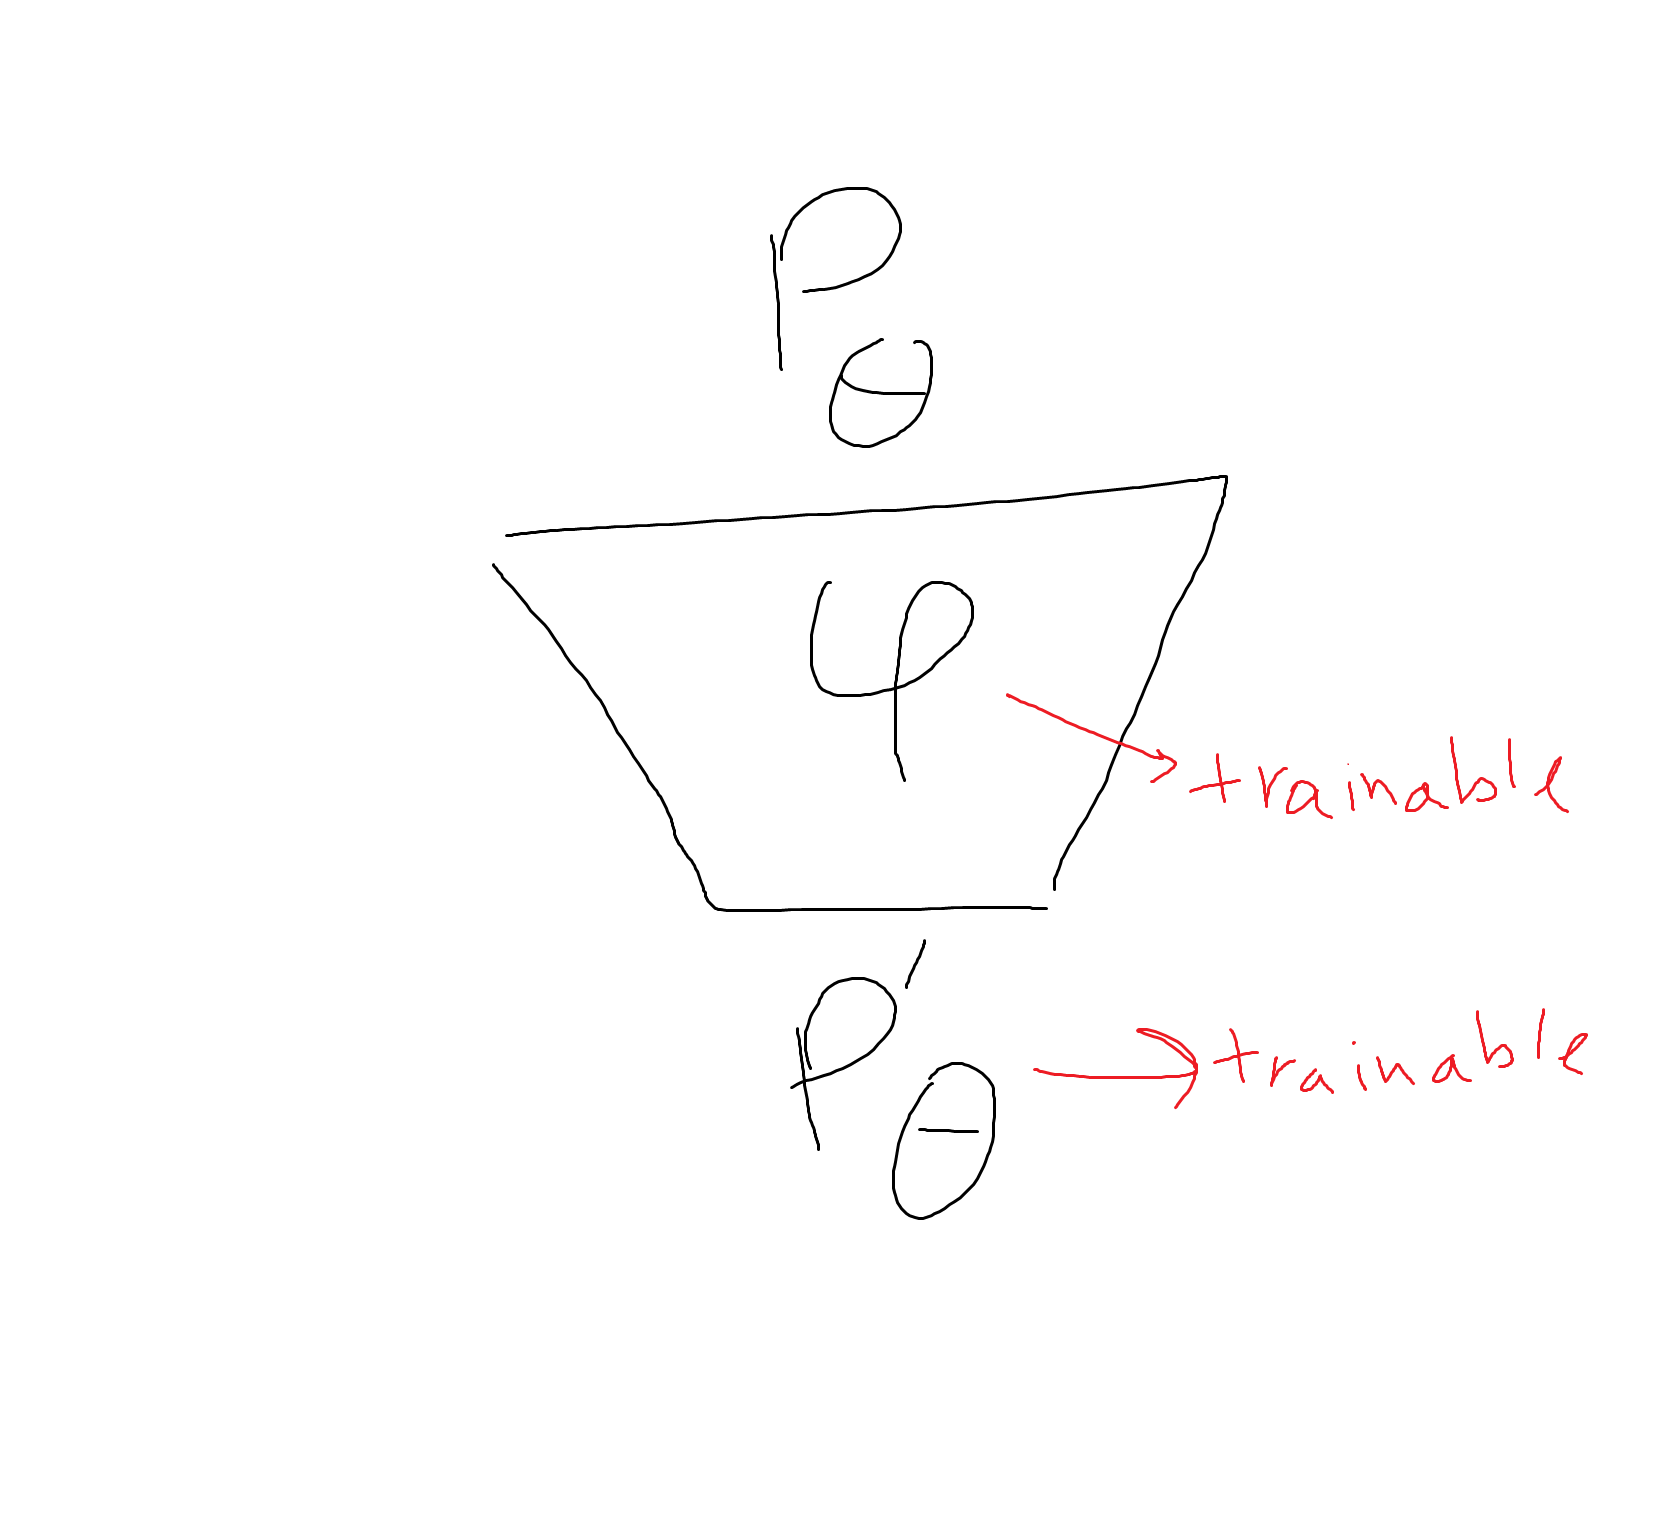

# Part 2 (35 points)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoModel
from transformers import AdamW
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

## Model Selection & Constants
We will use `bert-fa-base-uncased` as our base model from Hugging Face ([HF_Link](https://huggingface.co/HooshvareLab/bert-fa-base-uncased)). For our tuning, we intend to utilize 20 soft prompt tokens.

In [2]:
class CONFIG:
    seed = 42
    max_len = 128
    train_batch = 16
    valid_batch = 32
    epochs = 10
    n_tokens=20
    learning_rate = 0.01
    model_name = 'HooshvareLab/bert-fa-base-uncased'
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Dataset

The dataset contains around 7000 Persian sentences and their corresponding polarity, and have been manually classified into 5 categories (i.e. Angry).

### Load Dataset

In [3]:
import pandas as pd
file_path = "/content/softprompt_dataset.csv"
df = pd.read_csv(file_path)

### Pre-Processing

In [4]:
%pip install -U clean-text[gpl]
%pip install hazm

In [5]:
import re
from cleantext import clean
from hazm import *

In [6]:
import re
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

def cleaning(text):
    text = text.strip()

    # regular cleaning
    text = clean(text,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=False,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",
    )

    text = cleanhtml(text)

    # normalizing
    #normalizer = hazm.Normalizer()
    #text = normalizer.normalize(text)

    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text

In [7]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

tqdm.pandas()

def parallel_apply_with_progress(df, func, n_workers=4):
    with ThreadPoolExecutor(max_workers=n_workers) as executor, tqdm(total=len(df)) as pbar:
        def update(*args):
            pbar.update()

        results = []
        for result in executor.map(func, df['text']):
            results.append(result)
            update()

        df['text'] = pd.Series(results)

    return df

In [8]:
df = parallel_apply_with_progress(df, cleaning)

100%|██████████| 7023/7023 [00:03<00:00, 1946.24it/s]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                  df.label.values,
                                                  test_size=0.15,
                                                  random_state=42,
                                                  stratify=df.label.values)

train_df = df.loc[X_train]
validation_df = df.loc[X_val]

In [10]:
possible_labels = df.label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{0: 0, 1: 1, 2: 2, -1: 3, -2: 4}

In [11]:
train_df['label'] = train_df.label.replace(label_dict)
validation_df['label'] = validation_df.label.replace(label_dict)

### Create Dataset Class (5 Points)
In this step we will getting our dataset ready for training.

In this part we will define BERT-based dataset class for text classification, with configuration parameters. It preprocesses text data and tokenizes it using the BERT tokenizer.


Complete the preprocessing step in the __getitem__ method by adding padding tokens to 'input_ids' and 'attention_mask',
The count of this pad tokens is the same as `n_tokens`.

In [12]:
class BERTDataset(Dataset):
    def __init__(self,df):
        self.text = df['text'].values
        self.labels = df['label'].values
        self.all_labels = [0, 1, 2, 3, 4]
        self.max_len = CONFIG.max_len
        self.tokenizer = CONFIG.tokenizer
        self.n_tokens=CONFIG.n_tokens

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = self.text[index]
        text = ' '.join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )

        inputs['input_ids'] = inputs['input_ids'] + [self.tokenizer.pad_token_id] * self.n_tokens
        inputs['attention_mask'] = inputs['attention_mask'] + [0] * self.n_tokens

        labels = self.labels[index]
        label_dict = {label: (label == labels) for label in self.all_labels}
        labels_tensor = torch.tensor([float(label_dict[label]) for label in self.all_labels])

        inputs['input_ids'] = torch.tensor(inputs['input_ids'], dtype=torch.long)
        inputs['attention_mask'] = torch.tensor(inputs['attention_mask'], dtype=torch.long)

        return {
            'ids': inputs['input_ids'],
            'mask': inputs['attention_mask'],
            'label': labels_tensor
        }


In [13]:
train_dataset = BERTDataset(train_df)
validation_dataset = BERTDataset(validation_df)

## Define Prompt Embedding Layer (15 Points)
In this part we will define our prompt layer in `PROMPTEmbedding` module.


<font color='#73FF73'><b>You have to complete</b></font> `initialize_embedding` and  `forward` <font color='#73FF73'><b>functions.</b></font>

In `initialize_embedding` function initialize the learned embeddings based on whether they should be initialized from the vocabulary or randomly within the specified range.

In `forward` function, modify the input_embedding to extract the relevant part based on n_tokens.

Repeat the learned_embedding to match the size of input_embedding.

Concatenate the learned_embedding and input_embedding properly.


In [14]:
class PROMPTEmbedding(nn.Module):
    def __init__(self,
                emb_layer: nn.Embedding,
                n_tokens: int = 20,
                random_range: float = 0.5,
                initialize_from_vocab: bool = True):

      super(PROMPTEmbedding, self).__init__()
      self.emb_layer = emb_layer
      self.n_tokens = n_tokens
      self.learned_embedding = nn.parameter.Parameter(self.initialize_embedding(emb_layer,
                                                                               n_tokens,
                                                                               random_range,
                                                                               initialize_from_vocab))

    def initialize_embedding(self,
                             emb_layer: nn.Embedding,
                             n_tokens: int = 20,
                             random_range: float = 0.5,
                             initialize_from_vocab: bool = True):

      if initialize_from_vocab:
        vocab_emb = emb_layer.weight[:n_tokens].clone().detach()

        return vocab_emb

      else:
        random_emb = torch.FloatTensor(n_tokens, emb_layer.weight.size(1)).uniform_(-random_range, random_range)

      return random_emb


    def forward(self, tokens):
      input_embedding = self.emb_layer(tokens[:, self.n_tokens:])
      learned_embedding = self.learned_embedding.repeat(input_embedding.size(0), 1, 1)
      joined_embedding = torch.cat([learned_embedding, input_embedding], 1)

      return joined_embedding

## Replace model's embedding layer with our layer (5 Points)

In [16]:
# Define your BERT model
model = AutoModelForSequenceClassification.from_pretrained(CONFIG.model_name, num_labels=5, output_attentions = False,
                                                           output_hidden_states = False).to(CONFIG.device)

prompt_embedding_layer = PROMPTEmbedding(model.get_input_embeddings(), n_tokens=CONFIG.n_tokens)
model.set_input_embeddings(prompt_embedding_layer)

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Freezing Model Parameters (5 points)
In this part we will freeze entire model except `learned_embedding`

In [18]:
for param in model.parameters():
    if param is not prompt_embedding_layer.learned_embedding:
        param.requires_grad = False

## Optimizer


In [19]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=CONFIG.learning_rate)

## Training & Evaluation


### Define dataloaders

In [20]:
train_loader = DataLoader(train_dataset, batch_size=CONFIG.train_batch,
                              num_workers=2, shuffle=True, pin_memory=True)

validation_loader = DataLoader(validation_dataset, batch_size=CONFIG.valid_batch,
                              num_workers=2, shuffle=True, pin_memory=True)

### Define evaluation function

In [21]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = np.argmax(labels, axis=1).flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [22]:
def evaluate(val_dataloader):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in val_dataloader:


        inputs = {'input_ids':      batch['ids'].to(CONFIG.device),
                  'attention_mask': batch['mask'].to(CONFIG.device),
                  'labels':         batch['label'].to(CONFIG.device),
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs["loss"]
        logits = outputs["logits"]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(val_dataloader)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

### Define trainng loop


In [23]:
def train(model, optimizer, train_dataloader, val_dataloader):

    epochs = CONFIG.epochs

    for epoch in tqdm(range(1, epochs+1)):

      model.train()

      loss_train_total = 0

      progress_bar = tqdm(train_loader, desc='Epoch {:1d}'.format(epoch), leave=False, disable=True)

      for batch in progress_bar:

        optimizer.zero_grad()

        inputs = {'input_ids':      batch['ids'].to(CONFIG.device),
                  'attention_mask': batch['mask'].to(CONFIG.device),
                  'labels':         batch['label'].to(CONFIG.device),
                }

        output = model(**inputs)
        # print("here")
        loss = output["loss"]
        loss_train_total += loss.item()

        loss.backward()
        optimizer.step()
        # print("_______________________________")
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

      # print("here1")
      tqdm.write(f'\nEpoch {epoch}')
      loss_train_avg = loss_train_total/len(train_loader)
      tqdm.write(f'Training loss: {loss_train_avg}')


      val_loss, predictions, true_vals = evaluate(val_dataloader)
      val_f1 = f1_score_func(predictions, true_vals)
      tqdm.write(f'Validation loss: {val_loss}')
      tqdm.write(f'F1 Score (Weighted): {val_f1}')


### Run

Sorry about this part which is messy a bit. I ran out of GPU on all my accounts and i couldnt run it again :)

In [ ]:
train(model=model, optimizer=optimizer, train_dataloader=train_loader, val_dataloader=validation_loader)

  0%|          | 0/10 [00:00<?, ?it/s]

here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
h

  0%|          | 0/10 [01:44<?, ?it/s]

here
_______________________________
here1

Epoch 1
Training loss: 0.4617102708727281


 10%|█         | 1/10 [01:54<17:08, 114.30s/it]

Validation loss: 0.45662144007104816
F1 Score (Weighted): 0.22778175047732505
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_____________________________

 10%|█         | 1/10 [03:38<17:08, 114.30s/it]

here
_______________________________
here1

Epoch 2
Training loss: 0.460213259898405


 20%|██        | 2/10 [03:48<15:13, 114.20s/it]

Validation loss: 0.4550126628442244
F1 Score (Weighted): 0.233496096727495
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________


 20%|██        | 2/10 [05:32<15:13, 114.20s/it]

here
_______________________________
here1

Epoch 3
Training loss: 0.45860116398908235


 30%|███       | 3/10 [05:42<13:18, 114.06s/it]

Validation loss: 0.45476231882066437
F1 Score (Weighted): 0.2760208959651603
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
______________________________

 30%|███       | 3/10 [07:26<13:18, 114.06s/it]

here
_______________________________
here1

Epoch 4
Training loss: 0.4577245863682446


 40%|████      | 4/10 [07:36<11:23, 113.99s/it]

Validation loss: 0.45307910081112024
F1 Score (Weighted): 0.28000906598481573
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_____________________________

 40%|████      | 4/10 [09:20<11:23, 113.99s/it]

here
_______________________________
here1

Epoch 5
Training loss: 0.4574406907201451


 50%|█████     | 5/10 [09:30<09:29, 113.95s/it]

Validation loss: 0.4527055034131715
F1 Score (Weighted): 0.2932892524077127
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________

 50%|█████     | 5/10 [11:14<09:29, 113.95s/it]

here
_______________________________
here1

Epoch 6
Training loss: 0.456545691279804


 60%|██████    | 6/10 [11:24<07:35, 113.99s/it]

Validation loss: 0.45598057454282587
F1 Score (Weighted): 0.24633828062419974
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_____________________________

 60%|██████    | 6/10 [13:08<07:35, 113.99s/it]

here
_______________________________
here1

Epoch 7
Training loss: 0.4558929684646627


 70%|███████   | 7/10 [13:18<05:41, 113.95s/it]

Validation loss: 0.45076250126867584
F1 Score (Weighted): 0.30488324836462766
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_____________________________

 70%|███████   | 7/10 [15:02<05:41, 113.95s/it]

here1

Epoch 8
Training loss: 0.45552664835822776


 80%|████████  | 8/10 [15:12<03:48, 114.01s/it]

Validation loss: 0.4486972852186723
F1 Score (Weighted): 0.3159792442174104
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________

 80%|████████  | 8/10 [16:56<03:48, 114.01s/it]

here
_______________________________
here1

Epoch 9
Training loss: 0.4538693574660602


 90%|█████████ | 9/10 [17:06<01:54, 114.05s/it]

Validation loss: 0.4536092218124505
F1 Score (Weighted): 0.2090555387605956
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________
here
_______________________________

 90%|█████████ | 9/10 [18:50<01:54, 114.05s/it]

here
_______________________________
here1

Epoch 10
Training loss: 0.45334613108061217


100%|██████████| 10/10 [19:00<00:00, 114.03s/it]

Validation loss: 0.4481835952310851
F1 Score (Weighted): 0.31035696851383804


## Using OpenDelta library (5 Points)

In [25]:
!pip install opendelta

Use `OpenDelta` library to do the same thing. [link](https://opendelta.readthedocs.io/en/latest/modules/deltas.html)

For hyperparameters, test with `N_SOFT_PROMPT_TOKENS=10` and `N_SOFT_PROMPT_TOKENS=20` and report them.

In [34]:
from opendelta import SoftPromptModel
from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

soft_token_num = 10


soft_prompt_model = SoftPromptModel(
    backbone_model=model,
    soft_token_num=soft_token_num
)

device = "cuda" if torch.cuda.is_available() else "cpu"
soft_prompt_model.to(device)

input_text = "My name is Ali."
input_ids = tokenizer(input_text, return_tensors="pt")["input_ids"].to(device)
outputs = model(input_ids=input_ids)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [35]:
from opendelta import SoftPromptModel
from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

soft_token_num = 20


soft_prompt_model = SoftPromptModel(
    backbone_model=model,
    soft_token_num=soft_token_num
)

device = "cuda" if torch.cuda.is_available() else "cpu"
soft_prompt_model.to(device)

input_text = "My name is Ali."
input_ids = tokenizer(input_text, return_tensors="pt")["input_ids"].to(device)
outputs = model(input_ids=input_ids)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * Yes. Chat GPT and Gemini


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    * 1) My Prompts: The questions. And also sometimes interacting with AI for improving the answer or asking my questions.
    * 2.1) My Prompt: I gave the code to complete it.

    * 2.2) My Prompt: I gave the code with instruction to compelete it.

    * 2.3) My Prompt: I gave the code with instruction to compelete it.

    * 2.4) My Prompt: no prompt.

    * 2.5) My Prompt: no prompt.

*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * 1.a) First I explored the internet. This [paper](https://arxiv.org/pdf/2310.06239) was very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote the answer based on that link and AI' answers.

    * 1.b) First I explored the internet. These papers [1](https://openreview.net/pdf?id=5U6lTLr1jZw), [2](https://openreview.net/pdf?id=MHWDdMEJ5s) were very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote the answer based on that link and AI' answers.

    * 1.c) First I explored the internet. These papers [1](https://arxiv.org/abs/2109.04332), [2](https://arxiv.org/abs/2101.00190), [3](https://arxiv.org/abs/2104.08691) were very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote the answer based on that link and AI' answers.

    * 1.d) I explored the internet. The Prefix tuning paper was very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote the answer based on that link and AI' answers.

    * 2.1) AI's code had bug. Then I asked TA for the debug.
    
    * 2.2) I gave the code with instruction to compelete it.

    * 2.3) I gave the code with instruction to compelete it.

    * 2.4)  I wrote it by myself.

    * 2.5) I read the documentation and codes. I wrote them by myself. AI wasn't working and didn't know about it.